In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 
import os

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
import time

In [3]:
from load_data import load_processed_general_data
from load_data import load_processed_society_data
from load_data import load_processed_quality_of_life_data

In [4]:
def auto_fill(df,list):
    n = len(list)
    for i in range(n):
        #print(general_data[['median_houses_2020']].median())
        #use mean 
        #print(general_data[['median_houses_2020']].mean())
        # normalization data
        median = df[list[i]].median()
        df[list[i]].fillna(median, inplace=True)
    return df

In [5]:
def replace_placeholder(table):
    n = len(table.columns)
    for i in range(0,n):
        index = table.columns[i]
        the_median = table[index].median()
        table[index] = table[index].replace(-1, the_median)
    return table

In [6]:
def MinMaxNormal(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_pred)-MinMaxNormal(y_true))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [8]:
median_houses_2020,lower_quatile_houses_2020,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,local_authority_names = load_processed_general_data()
worksheet,lower_quatile_earning_2020,ratio_by_lower_quatile_2020,median_earning_2020,ratio_by_medians_2020,month_rent_higher_quatile,month_rent_lower_quatile,total_threaten_homeless,violence_crime_ratio,sexual_crime_ratio,robbery_crime_ratio,theft_crime_ratio,damage_arson_crime_ratio,drug_crime_ratio,other_crime_ratio,employment_data,male_life_expectency,female_life_expectency,total_households_2020,households_with_children_ratio,one_female_households_ratio,one_male_households_ratio,pop_under_10_ratio,pop_teenager_ratio,pop_20_39_ratio,pop_40_60_ratio,pop_60_80_ratio,pop_80_90_ratio,total_population_2020,size_of_la_area = load_processed_society_data()
taxi_only_licensed_drivers,total_drivers,education_sector_size,health_sector_size,art_and_entertainment_sector_size,retail_sector_size = load_processed_quality_of_life_data()

In [9]:
quality_of_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Education'],worksheet['Arts, entertainment, recreation & other services'],worksheet['Year 2020: One person households: Female ratio'],worksheet['Year 2020: One person households: Male ratio'],worksheet['Year 2020: Households with dependent children ratio'],worksheet['pop_ratio_under_10'],worksheet['pop_ratio_teenager'],worksheet['pop_ratio_20_39'],worksheet['pop_ratio_40_60'],worksheet['pop_ratio_60_80'],worksheet['pop_ratio_80_90+']])
print(quality_of_life_dataframe)
quality_of_life_dataframe = quality_of_life_dataframe.transpose()
quality_of_life_dataframe = replace_placeholder(quality_of_life_dataframe)

                                                              0    \
median_houses_2020                                  315000.000000   
Education                                               45.000000   
Arts, entertainment, recreation & other services       160.000000   
Year 2020: One person households: Female ratio           0.334971   
Year 2020: One person households: Male ratio             0.239601   
Year 2020: Households with dependent children r...       0.425429   
pop_ratio_under_10                                       0.115756   
pop_ratio_teenager                                       0.106984   
pop_ratio_20_39                                          0.202175   
pop_ratio_40_60                                          0.278545   
pop_ratio_60_80                                          0.227367   
pop_ratio_80_90+                                         0.069173   

                                                              1    \
median_houses_2020               

In [10]:
taxi_only_licensed_drivers_ratio = taxi_only_licensed_drivers/total_households_2020
taxi_only_licensed_drivers_ratio = taxi_only_licensed_drivers_ratio.astype('float')
taxi_only_licensed_drivers_ratio = pd.DataFrame(taxi_only_licensed_drivers_ratio)
taxi_only_licensed_drivers_ratio.columns=['taxi_only_licensed_drivers_ratio_to_households']

total_drivers_ratio = total_drivers/total_households_2020
total_drivers_ratio = total_drivers_ratio.astype('float')
total_drivers_ratio = pd.DataFrame(total_drivers_ratio)
total_drivers_ratio.columns=['total_drivers_ratio_to_households']

health_sector_size_ratio = health_sector_size/total_households_2020
health_sector_size_ratio = health_sector_size_ratio.astype('float')
health_sector_size_ratio = pd.DataFrame(health_sector_size_ratio)
health_sector_size_ratio.columns=['health_sector_size_ratio_to_households']

retail_sector_size_ratio = retail_sector_size/total_households_2020
retail_sector_size_ratio = retail_sector_size_ratio.astype('float')
retail_sector_size_ratio = pd.DataFrame(retail_sector_size_ratio)
retail_sector_size_ratio.columns=['retail_sector_size_ratio_to_households']

In [11]:
pd.DataFrame([retail_sector_size_ratio['retail_sector_size_ratio_to_households'],retail_sector_size_ratio['retail_sector_size_ratio_to_households']])

,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
retail_sector_size_ratio_to_households,0.006205,0.008492,0.005744,0.007637,0.009737,0.006174,0.006343,0.007745,0.005315,0.009105,...,0.004959,0.004411,0.006452,0.005264,0.007123,0.00655,0.007119,0.008342,0.006359,0.006484
retail_sector_size_ratio_to_households,0.006205,0.008492,0.005744,0.007637,0.009737,0.006174,0.006343,0.007745,0.005315,0.009105,...,0.004959,0.004411,0.006452,0.005264,0.007123,0.00655,0.007119,0.008342,0.006359,0.006484


In [12]:
daily_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],health_sector_size_ratio['health_sector_size_ratio_to_households'],retail_sector_size_ratio['retail_sector_size_ratio_to_households'],taxi_only_licensed_drivers_ratio['taxi_only_licensed_drivers_ratio_to_households'],total_drivers_ratio['total_drivers_ratio_to_households'],A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,male_life_expectency,female_life_expectency])
daily_life_dataframe = daily_life_dataframe.transpose()
daily_life_dataframe = replace_placeholder(daily_life_dataframe)
print(daily_life_dataframe)

     median_houses_2020  health_sector_size_ratio_to_households  \
0              315000.0                                0.003191   
1              164500.0                                0.002797   
2              415000.0                                0.003655   
3              195000.0                                0.003096   
4              178000.0                                0.004164   
..                  ...                                     ...   
342            225000.0                                0.002312   
343            325000.0                                0.004221   
344            242500.0                                0.003337   
345            187500.0                                0.003146   
346            222500.0                                0.002906   

     retail_sector_size_ratio_to_households  \
0                                  0.006205   
1                                  0.008492   
2                                  0.005744   
3      

In [13]:
social_space_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Robbery ratio'],worksheet['Theft offences ratio'],worksheet['Criminal damage and arson ratio'],worksheet['Drug offences ratio'],worksheet['Total Employee All (thousands)'],worksheet['Total_Threaten_or_is_Homeless']])
social_space_dataframe = social_space_dataframe.transpose()
social_space_dataframe = replace_placeholder(social_space_dataframe)
print(social_space_dataframe)

     median_houses_2020  Robbery ratio  Theft offences ratio  \
0              315000.0       0.006277              0.266633   
1              164500.0       0.005292              0.303901   
2              415000.0       0.011328              0.278083   
3              195000.0       0.002394              0.259377   
4              178000.0       0.006343              0.332382   
..                  ...            ...                   ...   
342            225000.0       0.005362              0.217696   
343            325000.0       0.011185              0.333950   
344            242500.0       0.005480              0.268025   
345            187500.0       0.005020              0.288272   
346            222500.0       0.001762              0.309353   

     Criminal damage and arson ratio  Drug offences ratio  \
0                           0.129300             0.037660   
1                           0.138796             0.017690   
2                           0.108513            

In [14]:
personal_space = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns != 'median_houses_2020'].astype('float')
personal_class = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns == 'median_houses_2020'].astype('int')

daily_space = daily_life_dataframe.iloc[:, daily_life_dataframe.columns != 'median_houses_2020'].astype('float')
daily_class = daily_life_dataframe.iloc[:, daily_life_dataframe.columns == 'median_houses_2020'].astype('int')

social_space = social_space_dataframe.iloc[:, social_space_dataframe.columns != 'median_houses_2020'].astype('float')
social_class = social_space_dataframe.iloc[:, social_space_dataframe.columns == 'median_houses_2020'].astype('int')

In [15]:
################
pl_training_set, pl_test_set, pl_class_set, test_pl_class_set = train_test_split(personal_space,
                                                                    personal_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_pl_class_set = pl_class_set
pl_class_set = normal_pl_class_set.values.ravel() 
normal_test_pl_class_set = test_pl_class_set
test_pl_class_set = normal_test_pl_class_set.values.ravel() 

################
dl_training_set, dl_test_set, dl_class_set, test_dl_class_set = train_test_split(daily_space,
                                                                    daily_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_dl_class_set = dl_class_set
dl_class_set = normal_dl_class_set.values.ravel() 
normal_test_dl_class_set = test_dl_class_set
test_dl_class_set = normal_test_dl_class_set.values.ravel() 

################
sl_training_set, sl_test_set, sl_class_set, test_sl_class_set = train_test_split(social_space,
                                                                    social_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_sl_class_set = sl_class_set
sl_class_set = normal_sl_class_set.values.ravel() 
normal_test_sl_class_set = test_sl_class_set
test_sl_class_set = normal_test_sl_class_set.values.ravel() 

In [16]:
# Set the random state for reproducibility
pl_fit_rf = RandomForestClassifier(random_state=0)
dl_fit_rf = RandomForestClassifier(random_state=0)
sl_fit_rf = RandomForestClassifier(random_state=0)

In [17]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(pl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(pl_training_set, pl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

/Users/leekayiu/opt/anaconda3/envs/geo/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/Users/leekayiu/opt/anaconda3/envs/geo/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}
Time taken in grid search:  106.40


In [18]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(dl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(dl_training_set, dl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

/Users/leekayiu/opt/anaconda3/envs/geo/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/Users/leekayiu/opt/anaconda3/envs/geo/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  94.22


In [19]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(sl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(sl_training_set, sl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

/Users/leekayiu/opt/anaconda3/envs/geo/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/Users/leekayiu/opt/anaconda3/envs/geo/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto'}
Time taken in grid search:  75.76


In [20]:
# Set best parameters given by grid search 
pl_fit_rf = pl_fit_rf.set_params(n_estimators=400,criterion = 'gini',
                  max_features = None, 
                  max_depth = 10)

# Set best parameters given by grid search 
dl_fit_rf = dl_fit_rf.set_params(n_estimators=400,criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 4)

# Set best parameters given by grid search 
sl_fit_rf = sl_fit_rf.set_params(n_estimators=400,criterion = 'entropy',
                  max_features = None, 
                  max_depth = 3)

In [21]:
pl_hundredYard_forest = pl_fit_rf.fit(pl_training_set, pl_class_set)
dl_hundredYard_forest = dl_fit_rf.fit(dl_training_set, dl_class_set)
sl_hundredYard_forest = sl_fit_rf.fit(sl_training_set, sl_class_set)

In [22]:
pl_predictions = pl_hundredYard_forest.predict(pl_test_set)
dl_predictions = dl_hundredYard_forest.predict(dl_test_set)
sl_predictions = sl_hundredYard_forest.predict(sl_test_set)

In [23]:
pl_feature_importance_score = list(pl_hundredYard_forest.feature_importances_)
dl_feature_importance_score = list(dl_hundredYard_forest.feature_importances_)
sl_feature_importance_score = list(sl_hundredYard_forest.feature_importances_)

In [24]:
print('PL Model R2 Score: '+str(r2_score(test_pl_class_set,pl_predictions)))

pl_coef = np.corrcoef(test_pl_class_set,pl_predictions)
pl_coef = pl_coef[0,1]
print('PL Model Correlation Coefficient: '+str(pl_coef))

PLMSPE = mean_absolute_percentage_error(test_pl_class_set,pl_predictions)
print('PL Mean Squared Percentage Error: '+str(PLMSPE))

PL Model R2 Score: 0.6485975847784007
PL Model Correlation Coefficient: 0.8098591824184219
PL Mean Squared Percentage Error: 5.693605771796822


In [25]:
print('DL Model R2 Score: '+str(r2_score(test_dl_class_set,dl_predictions)))

dl_coef = np.corrcoef(test_dl_class_set,dl_predictions)
dl_coef = dl_coef[0,1]
print('DL Model Correlation Coefficient: '+str(dl_coef))

DLMSPE = mean_absolute_percentage_error(test_dl_class_set,dl_predictions)
print('DL Mean Squared Percentage Error: '+str(DLMSPE))

DL Model R2 Score: 0.6446064402204577
DL Model Correlation Coefficient: 0.8033612579761144
DL Mean Squared Percentage Error: 7.601706723499755


In [26]:
print('SL Model R2 Score: '+str(r2_score(test_sl_class_set,sl_predictions)))

sl_coef = np.corrcoef(test_sl_class_set,sl_predictions)
sl_coef = sl_coef[0,1]
print('SL Model Correlation Coefficient: '+str(sl_coef))

SLMSPE = mean_absolute_percentage_error(test_sl_class_set,sl_predictions)
print('SL Mean Squared Percentage Error: '+str(SLMSPE))

SL Model R2 Score: 0.24584542561391476
SL Model Correlation Coefficient: 0.5601326074007709
SL Mean Squared Percentage Error: 20.556035158703004


In [27]:
# normalization data




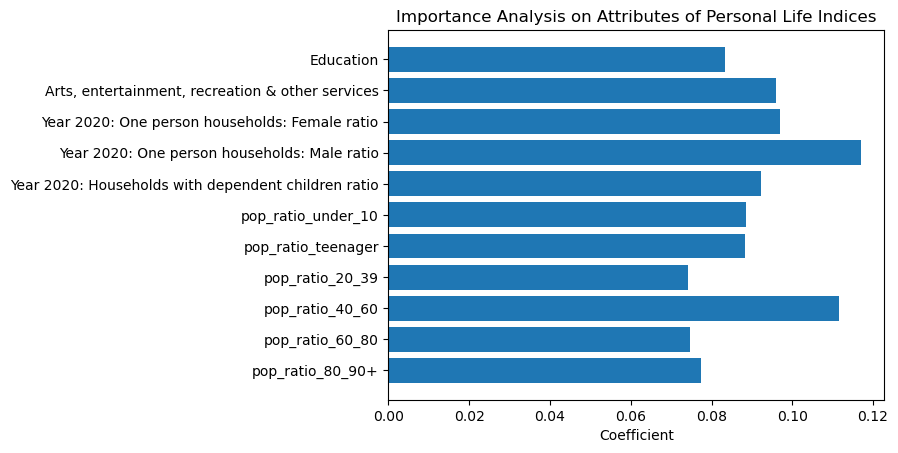

In [28]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(pl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, pl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Personal Life Indices')
plt.savefig('Figure/personal_life_group_random_forest_importance_score_analysis.png')
plt.show()

In [29]:
pl_feature_importance_score_csv = pd.DataFrame(pl_hundredYard_forest.feature_importances_)
pl_feature_importance_score_csv.index = pl_hundredYard_forest.feature_names_in_[:]
pl_feature_importance_score_csv.columns = ['RF Importance']
cwd = os.getcwd()
pl_feature_importance_score_csv.to_csv(os.path.join(cwd, "ResultTables/personal_life_model_scores.csv"))  

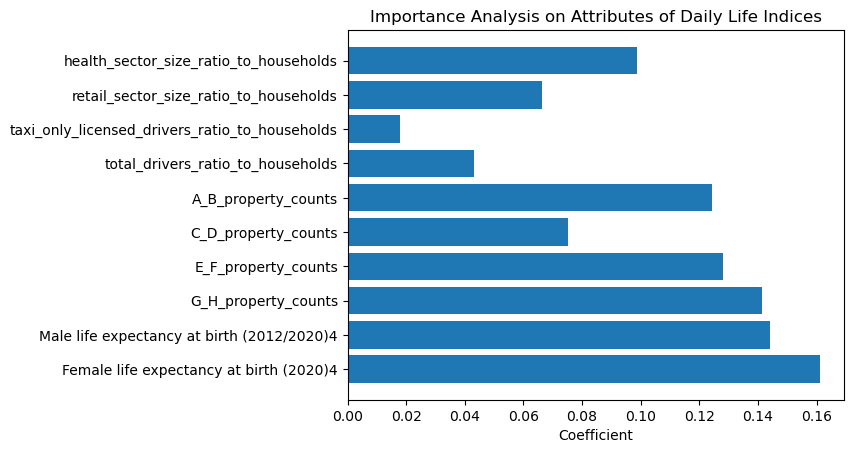

In [30]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(dl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, dl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Daily Life Indices')
plt.savefig('Figure/daily_life_group_random_forest_importance_score_analysis.png')
plt.show()

In [31]:
dl_feature_importance_score_csv = pd.DataFrame(dl_hundredYard_forest.feature_importances_)
dl_feature_importance_score_csv.index = dl_hundredYard_forest.feature_names_in_[:]
dl_feature_importance_score_csv.columns = ['RF Importance']
cwd = os.getcwd()
dl_feature_importance_score_csv.to_csv(os.path.join(cwd, "ResultTables/daily_life_model_scores.csv"))  

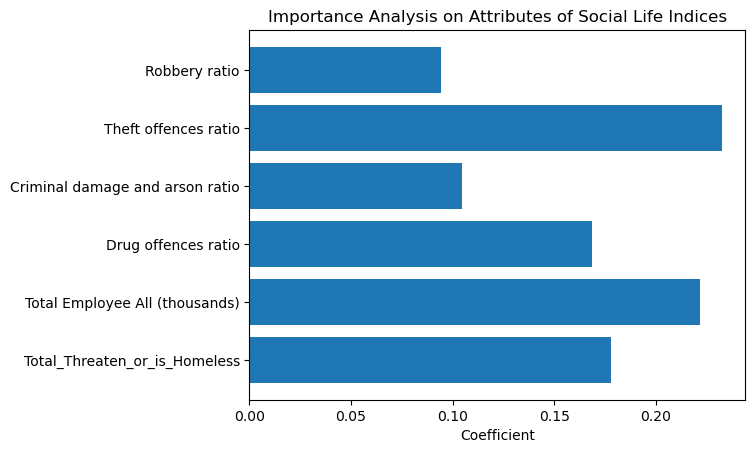

In [32]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(sl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, sl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Life Indices')
plt.savefig('Figure/social_life_group_random_forest_importance_score_analysis.png')
plt.show()

In [33]:
sl_feature_importance_score_csv = pd.DataFrame(sl_hundredYard_forest.feature_importances_)
sl_feature_importance_score_csv.index = sl_hundredYard_forest.feature_names_in_[:]
sl_feature_importance_score_csv.columns = ['RF Importance']
cwd = os.getcwd()
sl_feature_importance_score_csv.to_csv(os.path.join(cwd, "ResultTables/social_life_model_scores.csv"))  

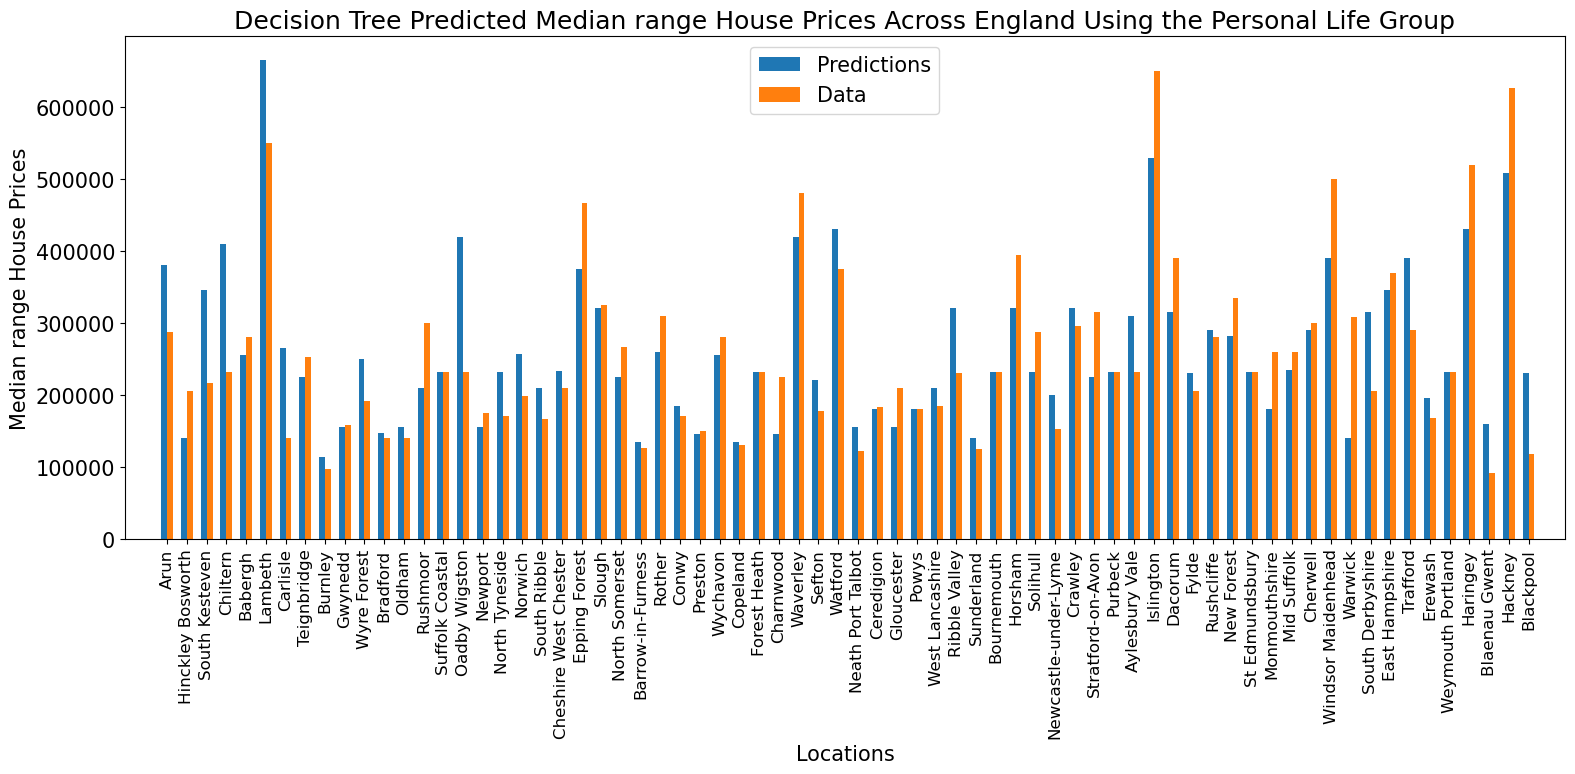

In [34]:
#Plot and save the test results
f_predictions = pl_predictions
test_y = test_pl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Personal Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_pl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/pl_model_Random_forest_test_result.png')
plt.show()

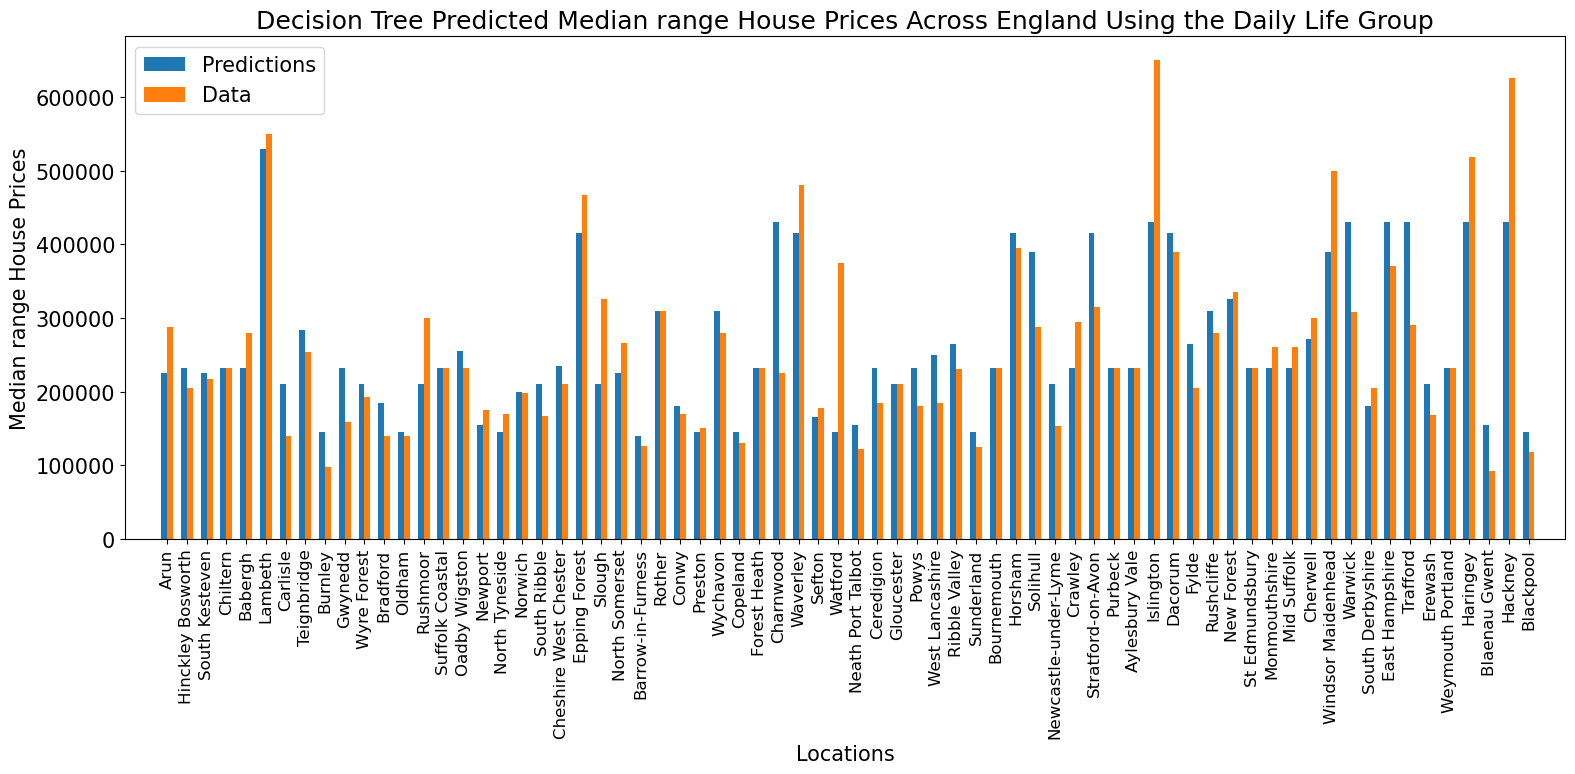

In [35]:
#Plot and save the test results
f_predictions = dl_predictions
test_y = test_dl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Daily Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_dl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/dl_model_Random_forest_test_result.png')
plt.show()

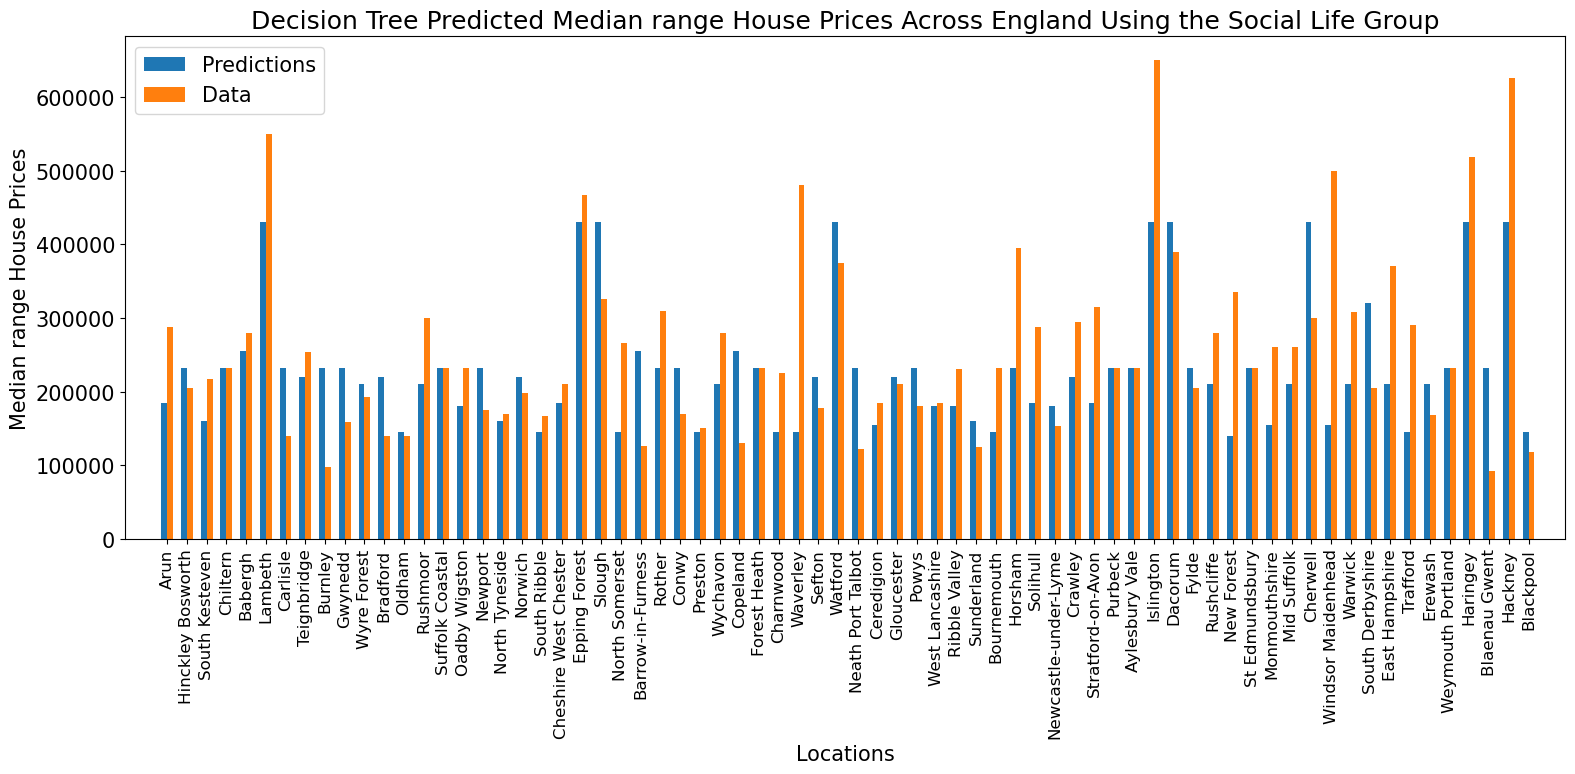

In [36]:
#Plot and save the test results
f_predictions = sl_predictions
test_y = test_sl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Social Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_sl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/sl_model_Random_forest_test_result.png')
plt.show()

In [37]:
def get_score(df,list,score , normalise = False):
    n = len(list)
    for i in range(n):
        df[list[i]] = df[list[i]]*score['RF Importance'][i]
    #can do a final normalise to scale up the value for a better vvalue for heatmap
    if normalise == True :
        df = MinMaxNormal(df.sum(axis='columns'))
    else:
        df = df.sum(axis='columns')
    return df

In [38]:
!pwd

general_data=pd.read_csv('all_in_one.csv')
label=  general_data[['Local Authority code','Local Authority name']]
# quality_of_life
quality_of_life_list = quality_of_life_dataframe.drop(columns=['median_houses_2020']).columns
quality_of_life_data = auto_fill(quality_of_life_dataframe.drop(columns=['median_houses_2020']),quality_of_life_list)
quality_of_life_data_normalise = MinMaxNormal(quality_of_life_data)
# data * weighting
print(quality_of_life_data_normalise[quality_of_life_list[0]])
#quality_of_life_data_normalise[quality_of_life_list[0]]= quality_of_life_data_normalise[quality_of_life_list[0]]*pl_feature_importance_score_csv['RF Importance'][0]
print(quality_of_life_data_normalise[quality_of_life_list[0]])
quality_of_life_score = get_score(quality_of_life_data_normalise ,quality_of_life_list ,pl_feature_importance_score_csv )
print(quality_of_life_score)
quality_of_life_score_labeled = pd.concat([label, quality_of_life_score], axis=1)
cwd = os.getcwd()
quality_of_life_score_labeled.to_csv(os.path.join(cwd, "ResultTables/quality_of_life_score_labeled.csv"))  


/Users/leekayiu/workspace/mdm_3_phace_C


NameError: name 'quality_of_daily_life_list' is not defined

In [39]:
#score with autofill to estimate a score for a higher accuracy
general_data=pd.read_csv('all_in_one.csv')
label=  general_data[['Local Authority code','Local Authority name']]
# quality_of_life
#quality_of_life_list = ['Education','Arts, entertainment, recreation & other services','Year 2020: One person households: Female ratio','Year 2020: One person households: Male ratio','Year 2020: Households with dependent children ratio','pop_ratio_under_10','pop_ratio_teenager','pop_ratio_20_39','pop_ratio_40_60','pop_ratio_60_80','pop_ratio_80_90+']
#quality_of_life_data = auto_fill(general_data[quality_of_life_list],quality_of_life_list)
quality_of_life_list = quality_of_life_dataframe.drop(columns=['median_houses_2020']).columns
quality_of_life_data = auto_fill(quality_of_life_dataframe.drop(columns=['median_houses_2020']),quality_of_life_list)
#quality_of_daily_life_data_normalise = daily_life_dataframe
quality_of_life_data_normalise = MinMaxNormal(quality_of_life_data)
# data * weighting
print(quality_of_life_data)
#quality_of_life_data_normalise[quality_of_life_list[0]]= quality_of_life_data_normalise[quality_of_life_list[0]]*pl_feature_importance_score_csv['RF Importance'][0]
print(quality_of_life_data_normalise[quality_of_life_list[0]])
quality_of_life_score = get_score(quality_of_life_data_normalise ,quality_of_life_list ,pl_feature_importance_score_csv , normalise =True )
print(quality_of_life_score)
quality_of_life_score_labeled = pd.concat([label, quality_of_life_score], axis=1)
cwd = os.getcwd()
quality_of_life_score_labeled.to_csv(os.path.join(cwd, "ResultTables/quality_of_life_score_labeled_autofilled.csv"))  

print(quality_of_life_score_labeled)
#test=auto_fill(quality_of_life_data,quality_of_life_list)
#print(test.tail(30))


     Education  Arts, entertainment, recreation & other services  \
0         45.0                                             160.0   
1         40.0                                             235.0   
2         90.0                                             305.0   
3         55.0                                             145.0   
4        135.0                                             490.0   
..         ...                                               ...   
342       85.0                                             290.0   
343      145.0                                             600.0   
344      180.0                                             580.0   
345      180.0                                             865.0   
346       95.0                                             260.0   

     Year 2020: One person households: Female ratio  \
0                                          0.334971   
1                                          0.325149   
2                 

In [40]:
#Daily life

#score with autofill to estimate a score for a higher accuracy

general_data=pd.read_csv('all_in_one.csv')
label=  general_data[['Local Authority code','Local Authority name']]
# quality_of_life
#['health_sector_size_ratio_to_households','retail_sector_size_ratio_to_households','taxi_only_licensed_drivers_ratio_to_households','total_drivers_ratio_to_households','A_B_property_counts','C_D_property_counts','E_F_property_counts','G_H_property_counts','male_life_expectency','female_life_expectency']
#
quality_of_daily_life_list = daily_life_dataframe.drop(columns=['median_houses_2020']).columns
quality_of_daily_life_data = auto_fill(daily_life_dataframe.drop(columns=['median_houses_2020']),quality_of_daily_life_list)
#quality_of_daily_life_data_normalise = daily_life_dataframe
print(quality_of_daily_life_data)
quality_of_daily_life_data_normalise = MinMaxNormal(quality_of_daily_life_data)
# data * weighting
print(quality_of_daily_life_data_normalise[quality_of_daily_life_list[0]])
#quality_of_life_data_normalise[quality_of_life_list[0]]= quality_of_life_data_normalise[quality_of_life_list[0]]*pl_feature_importance_score_csv['RF Importance'][0]
print(quality_of_daily_life_data_normalise[quality_of_daily_life_list[0]])
quality_of_daily_life_score = get_score(quality_of_daily_life_data_normalise ,quality_of_daily_life_list ,dl_feature_importance_score_csv ,normalise = True)
print(quality_of_daily_life_score)
quality_of_daily_life_score_labeled = pd.concat([label, quality_of_daily_life_score], axis=1)
cwd = os.getcwd()
quality_of_daily_life_score_labeled.to_csv(os.path.join(cwd, "ResultTables/quality_of_daily_life_score_labeled_autofilled.csv"))  

print(quality_of_daily_life_score_labeled)
#test=auto_fill(quality_of_life_data,quality_of_life_list)
#print(test.tail(30))

     health_sector_size_ratio_to_households  \
0                                  0.003191   
1                                  0.002797   
2                                  0.003655   
3                                  0.003096   
4                                  0.004164   
..                                      ...   
342                                0.002312   
343                                0.004221   
344                                0.003337   
345                                0.003146   
346                                0.002906   

     retail_sector_size_ratio_to_households  \
0                                  0.006205   
1                                  0.008492   
2                                  0.005744   
3                                  0.007637   
4                                  0.009737   
..                                      ...   
342                                0.006550   
343                                0.007119   
344         

In [41]:
#Social life
#score with autofill to estimate a score for a higher accuracy

general_data=pd.read_csv('all_in_one.csv')
label=  general_data[['Local Authority code','Local Authority name']]
# quality_of_life
#['health_sector_size_ratio_to_households','retail_sector_size_ratio_to_households','taxi_only_licensed_drivers_ratio_to_households','total_drivers_ratio_to_households','A_B_property_counts','C_D_property_counts','E_F_property_counts','G_H_property_counts','male_life_expectency','female_life_expectency']
#
quality_of_social_life_list = social_space_dataframe.drop(columns=['median_houses_2020']).columns
quality_of_social_life_data = auto_fill(social_space_dataframe.drop(columns=['median_houses_2020']),quality_of_social_life_list)
#quality_of_daily_life_data_normalise = daily_life_dataframe
#print(quality_of_social_life_data)
quality_of_social_life_data_normalise = MinMaxNormal(quality_of_social_life_data)
print(quality_of_social_life_data_normalise)
# data * weighting

#quality_of_life_data_normalise[quality_of_life_list[0]]= quality_of_life_data_normalise[quality_of_life_list[0]]*pl_feature_importance_score_csv['RF Importance'][0]

quality_of_social_life_score = get_score(quality_of_social_life_data_normalise ,quality_of_social_life_list ,sl_feature_importance_score_csv ,normalise = True)
print(quality_of_social_life_score)
quality_of_social_life_score_labeled = pd.concat([label, quality_of_social_life_score], axis=1)
cwd = os.getcwd()
quality_of_social_life_score_labeled.to_csv(os.path.join(cwd, "ResultTables/quality_of_social_life_score_labeled_autofilled.csv"))  

print(quality_of_daily_life_score_labeled)

     Robbery ratio  Theft offences ratio  Criminal damage and arson ratio  \
0         0.097719              0.114444                         0.205669   
1         0.082386              0.156739                         0.226556   
2         0.176354              0.127438                         0.159952   
3         0.037275              0.106210                         0.207403   
4         0.098754              0.189062                         0.210774   
..             ...                   ...                              ...   
342       0.083487              0.058906                         0.188927   
343       0.174134              0.190841                         0.165996   
344       0.085312              0.116024                         0.155353   
345       0.078157              0.139002                         0.185371   
346       0.027430              0.162926                         0.200936   

     Drug offences ratio  Total Employee All (thousands)  \
0              

In [47]:
social_space_dataframe.drop(columns=['median_houses_2020']).columns
print(quality_of_social_life_score)
print(quality_of_life_score)
print(quality_of_daily_life_score)
general_score = (quality_of_daily_life_score+quality_of_life_score+quality_of_social_life_score)/3
general_score_labeled = pd.concat([label, general_score], axis=1)
cwd = os.getcwd()
general_score_labeled.to_csv(os.path.join(cwd, "ResultTables/general_score_labeled_autofilled.csv"))  

print(general_score_labeled)

0      0.089959
1      0.067570
2      0.082152
3      0.051469
4      0.199367
         ...   
342    0.153976
343    0.134021
344    0.163622
345    0.132663
346    0.123343
Length: 347, dtype: float64
0      0.301056
1      0.174996
2      0.299660
3      0.211018
4      0.320627
         ...   
342    0.182208
343    0.207372
344    0.261636
345    0.355439
346    0.203950
Length: 347, dtype: float64
0      0.315542
1      0.249991
2      0.608786
3      0.411611
4      0.222302
         ...   
342    0.381880
343    0.539714
344    0.500477
345    0.525591
346    0.301785
Length: 347, dtype: float64
    Local Authority code       Local Authority name         0
0              E07000223                       Adur  0.235519
1              E07000128                       Wyre  0.164186
2              E07000089                       Hart  0.330199
3              E07000030                       Eden  0.224699
4              E08000002                       Bury  0.247432
..              